<a href="https://colab.research.google.com/github/sarychief/BMSTU/blob/main/lab1-optimization/Research_Lotka_Volterra_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Постановка задачи

1. Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия. 
2. Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно заданном интервале моделирования. 
3. Отыскать экстремум предложенного критерия как функции 4-х параметров модели.

Например, отыскать значения параметров, обеспечивающие минимальную разницу между числом "хищников" и числом "жертв" на всем интервале моделирования.


## Описание

Мы рассмотрим модель Лотки-Вольтерры, также известную как уравнения хищник-жертва, которая представляет собой пару нелинейных дифференциальных уравнений первого порядка, часто используемых для описания динамики биологических систем, в которых взаимодействуют два вида. один хищник, а другой его добыча. 

$$\begin{cases}\frac{\partial x}{\partial t} = (\alpha - \beta y) * x \\ \frac{\partial y}{\partial t} = (- \gamma + \delta x) * y\end{cases}$$

- x — численность жертв
- y — численность хищников
- $\alpha$ — вероятностное значение размножнения травоядных
- $\beta$ — вероятностное значение смерти травоядного от хищника
- $\delta$ — вероятностное значение достатка еды хищнику на дальнейшее размножение
- $\gamma$ — вероятностное значение смерти хищника от голода

In [95]:
import matplotlib.pyplot as plt
import numpy as np


class LVmodel(object):

  def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001, alpha=0, beta=0, gamma=0, delta=0):
    
    self._dt = dt
    self._n_iters = int(tmax / dt)
    self.pred_init = pred_init
    self.prey_init = prey_init

    self.time = None
    self.prey = None
    self.pred = None

    self.alpha = alpha
    self.beta = beta
    self.gamma = gamma
    self.delta = delta

  def run(self):
    # инициализация входными параметрами
    self.time = np.zeros(self._n_iters)   
    self.prey = np.zeros(self._n_iters)   
    self.pred = np.zeros(self._n_iters)   
    self.prey[0] = self.prey_init         
    self.pred[0] = self.pred_init   
      

    for i in range(self._n_iters - 1):
      # инициализация системы диф уравнений Лотки-Волтерры в одномерном случае
      self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (self.alpha - self.pred[i] * self.beta)
      self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (self.delta * self.prey[i] - self.gamma)
    self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))

    return self.time, self.prey, self.pred


  def spec_points(self):
    y = (self.alpha * self.delta ** 2) + ()

  def system_phase_trajectories(self):
    if self.pred[0] != 0 and self.prey[0] != 0: 
      return self.alpha * np.log(self.pred) - self.beta * self.pred + self.gamma * np.log(self.prey) - self.delta * self.prey


  def plot(self):
    plt.title("Рис 1. Функция частоты популяций хищников и жертв")
    plt.xlabel('time')
    plt.ylabel('n')
    plt.plot(self.time, self.pred, label='predators', color='r')
    plt.plot(self.time, self.prey, label='preys', color='b')
    plt.legend()
    plt.grid()
    plt.show()

  def plot_cycle(self):
    plt.title("Рис 2. Фазовый портрет системы линий уровня поверхности ")
    plt.xlabel('n predators')
    plt.ylabel('n preys')
    plt.plot(self.pred, self.prey, color='black')
    xpoints = np.array([self.gamma / self.delta])  
    ypoints = np.array([self.alpha / self.beta])  
    plt.plot(xpoints, ypoints, 'o', c='r')  
    plt.grid()
    plt.show()  

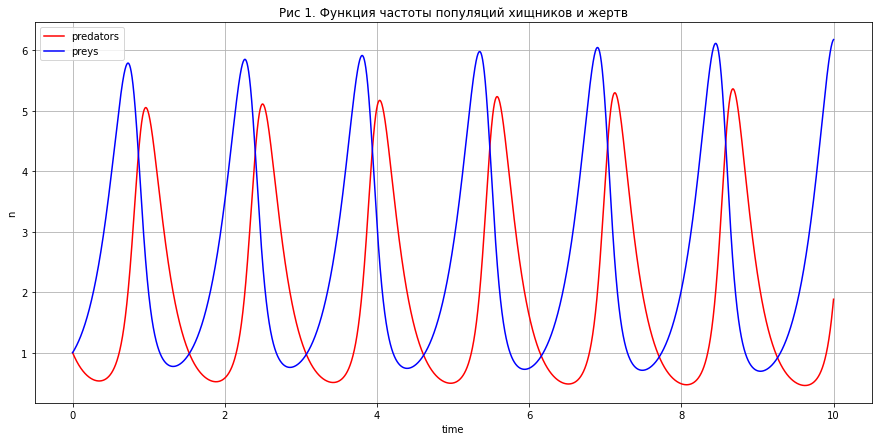

In [96]:
biome = LVmodel(tmax=10, alpha=4, beta=2, gamma=5, delta=2)
biome.run()
plt.figure(figsize=(15, 7))
biome.plot()

In [97]:
consts = biome.system_phase_trajectories()

Полученнное уравнение определяет семейство фазовых траекторий исходной системы Лотки-Волтерры, которые соответствуют ненулевым начальным условиям:
$$x(0) \neq 0,\ \  y(0) \neq 0$$

Эти фазовые траектории являются линиями уровня поверхности
$z = F(x, y)$

Точка $P_1$ является строгим максимумом функции F(x, y).
Плоскости x = 0, y = 0 являются асимптотическими для
поверхности z = F(x, y).
Фазовые траектории исходной системы, соответствующие ненулевым начальным условиям, являются замкнутыми линиями. Положение
равновесия $P_1$ является центром.

#### Вывод 1.
> Исходная система имеет одно устойчивое, но не асимптотически, положение равновесия $P_1(\frac{\alpha}{\beta},\frac{\gamma}{\delta})$ и одно неустойчивое – $P_0(0, 0)$ – при любых допустимых значениях параметров $\alpha,\beta,\gamma,\delta$

На __рис. 2__ представлен фазовый портрет исходной системы. Прямые
$y = \frac{\gamma}{\delta}\text{ и }x = 0$ являются горизонтальными изоклинами, прямые $x = \frac{ε1}{γ1}\text{ и } y = 0$ – вертикальными изоклинами.

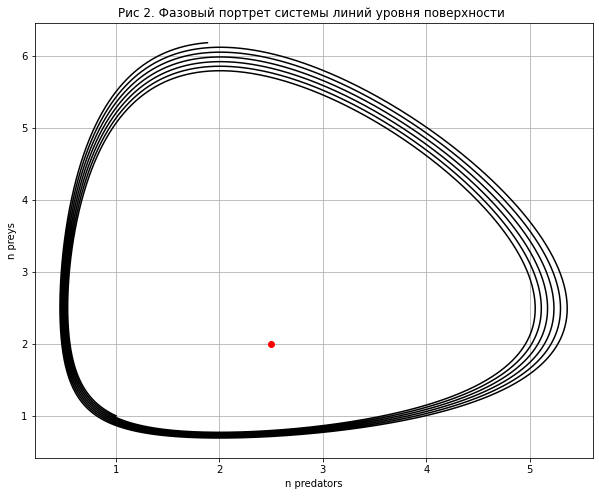

In [98]:
plt.figure(figsize=(10, 8))
biome.plot_cycle()

#### Вывод 2. 
Изменения численности жертвы и хищника во времени
представляют собой колебания, причем колебания численности
хищника отстают по фазе от колебаний численности жертвы